In [1]:
### import all the necessary libraries..

import pandas as pd           ### for data pre-processing 
import numpy as np            ### for numerical programming
import matplotlib.pyplot as plt   ## for plots/charts..

In [2]:
### lets read clean_data.csv

df=pd.read_csv(r'F:\Data_science_projects\Recommendation_sytem/clean_data.csv')

In [3]:
### lets print first 2 rows of data..

df.head(2)

Unnamed: 0     budget                                             genres  \
0           0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1           1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

      id                                           keywords original_language  \
0  19995  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1    285  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   

   runtime                                   spoken_languages  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1    169.0           [{"iso_639_1": "en", "name": "English"}]   

                                          tagline  vote_average  vote_count  \
0                     Enter the World of Pandora.           7.2       11800   
1  At the end of the world, the adventure begins.           6.9        4500   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [4]:
### lets find all the features-names of dataframe...

df.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

### Recommend movies to users Using Weighted average

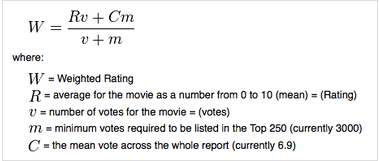

Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page

In [5]:
# Calculate all the components based on the above formula

v=df['vote_count']
C=df['vote_average'].mean()
R=df['vote_average']

In [6]:
C

### So, the mean rating for all the movies is approx 6.09 on a scale of 10

6.092171559442011

In [7]:
df['vote_count']

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_count'>

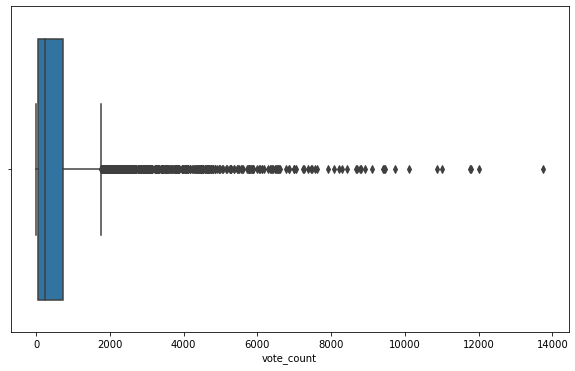

In [8]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(df['vote_count'])

In [9]:
#m=1900

In [10]:
#### The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. 
#### We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, 
#### it must have more votes than at least 90% of the movies in the list.

threshold=df['vote_count'].quantile(0.9)

In [11]:
threshold

1838.4000000000015

In [12]:
df[df['vote_count']>=1838]

Unnamed: 0     budget  \
0              0  237000000   
1              1  300000000   
2              2  245000000   
3              3  250000000   
4              4  260000000   
...          ...        ...   
4291        4291    1200000   
4300        4300    1200000   
4302        4302    1200000   
4337        4337    1300000   
4602        4602     350000   

                                                 genres      id  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
...                                                 ...     ...   
4291  [{"id": 27, "name": "Horror"}, {"id": 9648, "n...     176   
4300  [{"id": 80, "name": "Crime"}, {"id": 53, "name...     500   
4302                    [{"id": 37, "name": "Western"}]     429   
4337  [{"id": 80, "name": "Crime"}, {"id": 18, "name...     103   
4602                      [{"id": 18, "name": "Drama"}]     389   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4291  [{"id": 1366, "name": "shotgun"}, {"id": 13000...                en   
4300  [{"id": 2052, "name": "traitor"}, {"id": 6099,...                en   
4302  [{"id": 801, "name": "bounty hunter"}, {"id": ...                it   
4337  [{"id": 422, "name": "vietnam veteran"}, {"id"...                en   
4602  [{"id": 934, "name": "judge"}, {"id": 1417, "n...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4291                                       Saw   
4300                            Reservoir Dogs   
4302           Il buono, il brutto, il cattivo   
4337                               Taxi Driver   
4602                              12 Angry Men   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4291  Obsessed with teaching his victims the value o...   63.655973   
4300  A botched robbery indicates a police informant...   66.925866   
4302  While the Civil War rages between the Union an...   88.377076   
4337  A mentally unstable Vietnam War veteran works ...   58.845025   
4602  The defense and the prosecution have rested an...   59.259204   

                                   production_companies release_date  \
0     [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10   
1     [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   
2     [{"name": "Columbia Pictures", "id": 5}, {"nam...   2015-10-26   
3     [{"name": "Legendary Pictures", "id": 923}, {"...   2012-07-16   
4           [{"name": "Walt Disney Pictures", "id": 2}]   2012-03-07   
...              

In [13]:
data=df[df['vote_count']>=1838]

In [14]:
data.shape

(481, 19)

In [15]:
m=threshold

In [16]:
m

1838.4000000000015

In [17]:
def weighted_avg_rating(x,m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    
    return ((R*v) + (C*m))/(v + m)

In [18]:
# Define a new feature 'weighted_avg' and calculate value of `avg_weighted_rating'
`
data['weighted_avg']=data.apply(weighted_avg_rating,axis=1)

<ipython-input-18-4d882e6d2160>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weighted_avg']=data.apply(weighted_avg_rating,axis=1)


In [19]:
data.shape

(481, 20)

In [20]:
data.head(2)

Unnamed: 0     budget                                             genres  \
0           0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1           1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

      id                                           keywords original_language  \
0  19995  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1    285  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   

   runtime                                   spoken_languages  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1    169.0           [{"iso_639_1": "en", "name": "English"}]   

                                          tagline  vote_average  vote_count  \
0                     Enter the World of Pandora.           7.2       11800   
1  At the end of the world, the adventure begins.           6.9        4500   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  weighted_avg  
0  [{"credit_id": "52fe48009251416c750aca23", "de...      7.050669  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...      6.665696

In [21]:
df_sorted_ranking=data.sort_values('weighted_avg',ascending=False)

In [22]:
df_sorted_ranking.head(3)

Unnamed: 0     budget  \
1881        1881   25000000   
662          662   63000000   
65            65  185000000   

                                                 genres   id  \
1881  [{"id": 18, "name": "Drama"}, {"id": 80, "name...  278   
662                       [{"id": 18, "name": "Drama"}]  550   
65    [{"id": 18, "name": "Drama"}, {"id": 28, "name...  155   

                                               keywords original_language  \
1881  [{"id": 378, "name": "prison"}, {"id": 417, "n...                en   
662   [{"id": 825, "name": "support group"}, {"id": ...                en   
65    [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   

                original_title  \
1881  The Shawshank Redemption   
662                 Fight Club   
65             The Dark Knight   

                                               overview  popularity  \
1881  Framed in the 1940s for the double murder of h...  136.747729   
662   A ticking-time-bomb insomniac and a slippery s...  146.757391   
65    Batman raises the stakes in his war on crime. ...  187.322927   

                                   production_companies release_date  \
1881  [{"name": "Castle Rock Entertainment", "id": 97}]   1994-09-23   
662   [{"name": "Regency Enterprises", "id": 508}, {...   1999-10-15   
65    [{"name": "DC Comics", "id": 429}, {"name": "L...   2008-07-16   

         revenue  runtime                                   spoken_languages  \
1881    28341469    142.0           [{"iso_639_1": "en", "name": "English"}]   
662    100853753    139.0           [{"iso_639_1": "en", "name": "English"}]   
65    1004558444    152.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   

                                                tagline  vote_average  \
1881  Fear can hold you prisoner. Hope can set you f...           8.5   
662                             Mischief. Mayhem. Soap.           8.3   
65                                      Why So Serious?           8.2   

      vote_count                                               cast  \
1881        8205  [{"cast_id": 3, "character": "Andy Dufresne", ...   
662         9413  [{"cast_id": 4, "character": "The Narrator", "...   
65         12002  [{"cast_id": 35, "character": "Bruce Wayne", "...   

                                                   crew  weighted_avg  
1881  [{"credit_id": "52fe4231c3a36847f800b153", "de...      8.059258  
662   [{"credit_id": "55731b8192514111610027d7", "de...      7.939256  
65    [{"credit_id": "55a0eb4a925141296b0010f8", "de...      7.920020

In [23]:
df_sorted_ranking.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [24]:
df_sorted_ranking[['original_title','vote_average', 'vote_count','weighted_avg','popularity']].head(15)

original_title  vote_average  \
1881                           The Shawshank Redemption           8.5   
662                                          Fight Club           8.3   
65                                      The Dark Knight           8.2   
3232                                       Pulp Fiction           8.3   
96                                            Inception           8.1   
3337                                      The Godfather           8.4   
95                                         Interstellar           8.1   
809                                        Forrest Gump           8.2   
329       The Lord of the Rings: The Return of the King           8.1   
1990                            The Empire Strikes Back           8.2   
262   The Lord of the Rings: The Fellowship of the Ring           8.0   
2912                                          Star Wars           8.1   
1818                                   Schindler's List           8.3   
3865                                           Whiplash           8.3   
330               The Lord of the Rings: The Two Towers           8.0   

      vote_count  weighted_avg  popularity  
1881        8205      8.059258  136.747729  
662         9413      7.939256  146.757391  
65         12002      7.920020  187.322927  
3232        8428      7.904645  121.463076  
96         13752      7.863239  167.583710  
3337        5893      7.851236  143.659698  
95         10867      7.809479  724.247784  
809         7927      7.803188  138.133331  
329         8064      7.727243  123.630332  
1990        5879      7.697884   78.517830  
262         8705      7.667341  138.049577  
2912        6624      7.663813  126.393695  
1818        4329      7.641883  104.469351  
3865        4254      7.633781  192.528841  
330         7487      7.623893  106.914973

### finding most recommended movies on the basis of Weighted avg

Text(0, 0.5, 'movie title')

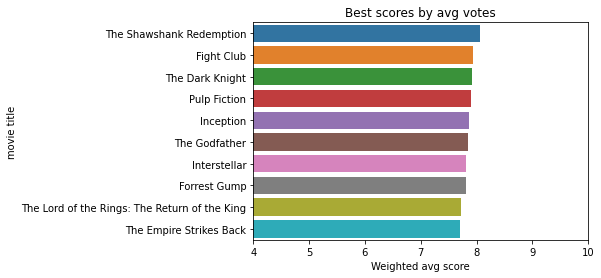

In [25]:
sns.barplot(x=df_sorted_ranking['weighted_avg'].head(10),y=df_sorted_ranking['original_title'].head(10),data=df_sorted_ranking)
plt.xlim(4,10)
plt.title('Best scores by avg votes')
plt.xlabel('Weighted avg score')
plt.ylabel('movie title')

## Recommend movies to users considering its popularity

In [26]:
data

Unnamed: 0     budget  \
0              0  237000000   
1              1  300000000   
2              2  245000000   
3              3  250000000   
4              4  260000000   
...          ...        ...   
4291        4291    1200000   
4300        4300    1200000   
4302        4302    1200000   
4337        4337    1300000   
4602        4602     350000   

                                                 genres      id  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
...                                                 ...     ...   
4291  [{"id": 27, "name": "Horror"}, {"id": 9648, "n...     176   
4300  [{"id": 80, "name": "Crime"}, {"id": 53, "name...     500   
4302                    [{"id": 37, "name": "Western"}]     429   
4337  [{"id": 80, "name": "Crime"}, {"id": 18, "name...     103   
4602                      [{"id": 18, "name": "Drama"}]     389   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4291  [{"id": 1366, "name": "shotgun"}, {"id": 13000...                en   
4300  [{"id": 2052, "name": "traitor"}, {"id": 6099,...                en   
4302  [{"id": 801, "name": "bounty hunter"}, {"id": ...                it   
4337  [{"id": 422, "name": "vietnam veteran"}, {"id"...                en   
4602  [{"id": 934, "name": "judge"}, {"id": 1417, "n...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4291                                       Saw   
4300                            Reservoir Dogs   
4302           Il buono, il brutto, il cattivo   
4337                               Taxi Driver   
4602                              12 Angry Men   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4291  Obsessed with teaching his victims the value o...   63.655973   
4300  A botched robbery indicates a police informant...   66.925866   
4302  While the Civil War rages between the Union an...   88.377076   
4337  A mentally unstable Vietnam War veteran works ...   58.845025   
4602  The defense and the prosecution have rested an...   59.259204   

                                   production_companies release_date  \
0     [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10   
1     [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   
2     [{"name": "Columbia Pictures", "id": 5}, {"nam...   2015-10-26   
3     [{"name": "Legendary Pictures", "id": 923}, {"...   2012-07-16   
4           [{"name": "Walt Disney Pictures", "id": 2}]   2012-03-07   
...              

In [27]:
data.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [28]:
### Under the Trending Now tab of these systems we find movies that are very popular and they can just be obtained by 
### sorting the dataset by the popularity column.

popularity=data.sort_values('popularity',ascending=False)

In [29]:
popularity

Unnamed: 0     budget  \
546          546   74000000   
95            95  165000000   
788          788   58000000   
94            94  170000000   
127          127  150000000   
...          ...        ...   
101          101  160000000   
203          203  110000000   
508          508   73000000   
2511        2511   18000000   
334          334   93000000   

                                                 genres      id  \
546   [{"id": 10751, "name": "Family"}, {"id": 16, "...  211672   
95    [{"id": 12, "name": "Adventure"}, {"id": 18, "...  157336   
788   [{"id": 28, "name": "Action"}, {"id": 12, "nam...  293660   
94    [{"id": 28, "name": "Action"}, {"id": 878, "na...  118340   
127   [{"id": 28, "name": "Action"}, {"id": 12, "nam...   76341   
...                                                 ...     ...   
101   [{"id": 28, "name": "Action"}, {"id": 878, "na...   49538   
203   [{"id": 12, "name": "Adventure"}, {"id": 28, "...   36658   
508   [{"id": 12, "name": "Adventure"}, {"id": 28, "...     330   
2511  [{"id": 35, "name": "Comedy"}, {"id": 10751, "...     771   
334   [{"id": 12, "name": "Adventure"}, {"id": 28, "...     331   

                                               keywords original_language  \
546   [{"id": 3487, "name": "assistant"}, {"id": 179...                en   
95    [{"id": 83, "name": "saving the world"}, {"id"...                en   
788   [{"id": 2095, "name": "anti hero"}, {"id": 307...                en   
94    [{"id": 8828, "name": "marvel comic"}, {"id": ...                en   
127   [{"id": 2964, "name": "future"}, {"id": 3713, ...                en   
...                                                 ...               ...   
101   [{"id": 591, "name": "cia"}, {"id": 1852, "nam...                en   
203   [{"id": 1852, "name": "mutant"}, {"id": 8828, ...                en   
508   [{"id": 911, "name": "exotic island"}, {"id": ...                en   
2511  [{"id": 65, "name": "holiday"}, {"id": 1437, "...                en   
334   [{"id": 911, "name": "exotic island"}, {"id": ...                en   

                     original_title  \
546                         Minions   
95                     Interstellar   
788                        Deadpool   
94          Guardians of the Galaxy   
127              Mad Max: Fury Road   
...                             ...   
101              X-Men: First Class   
203                              X2   
508   The Lost World: Jurassic Park   
2511                     Home Alone   
334               Jurassic Park III   

                                               overview  popularity  \
546   Minions Stuart, Kevin and Bob are recruited by...  875.581305   
95    Interstellar chronicles the adventures of a gr...  724.247784   
788   Deadpool tells the origin story of former Spec...  514.569956   
94    Light years from Earth, 26 years after being a...  481.098624   
127   An apocalyptic story set in the furthest reach...  434.278564   
...                                                 ...         ...   
101   Before Charles Xavier and Erik Lensherr took t...    3.195174   
203   Professor Charles Xavier and his team of genet...    2.871739   
508   Four years after Jurassic Park's genetically b...    2.502487   
2511  Eight-year-old Kevin McCallister makes the mos...    2.186927   
334   In need of funds for research, Dr. Alan Grant ...    1.859364   

                                   production_companies release_date  \
546   [{"name": "Universal Pictures", "id": 33}, {"n...   2015-06-17   
95    [{"name": "Paramount Pictures", "id": 4}, {"na...   2014-11-05   
788   [{"name": "Twentieth Century Fox Film Corporat...   2016-02-09   
94    [{"name": "Marvel Studios", "id": 420}, {"name...   2014-07-30   
127   [{"name": "Village Roadshow Pictures", "id": 7...   2015-05-13   
...                                                 ...          ...   
101   [{"name": "Ingenious Film Partners", "id": 289...   2011-05-24   
203  

In [30]:
popularity.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [31]:
pop=popularity[['original_title','popularity','vote_average', 'vote_count']]

In [32]:
pop

original_title  popularity  vote_average  vote_count
546                         Minions  875.581305           6.4        4571
95                     Interstellar  724.247784           8.1       10867
788                        Deadpool  514.569956           7.4       10995
94          Guardians of the Galaxy  481.098624           7.9        9742
127              Mad Max: Fury Road  434.278564           7.2        9427
...                             ...         ...           ...         ...
101              X-Men: First Class    3.195174           7.1        5181
203                              X2    2.871739           6.8        3506
508   The Lost World: Jurassic Park    2.502487           6.2        2487
2511                     Home Alone    2.186927           7.1        2414
334               Jurassic Park III    1.859364           5.7        2077

[481 rows x 4 columns]

Text(0, 0.5, 'scores')

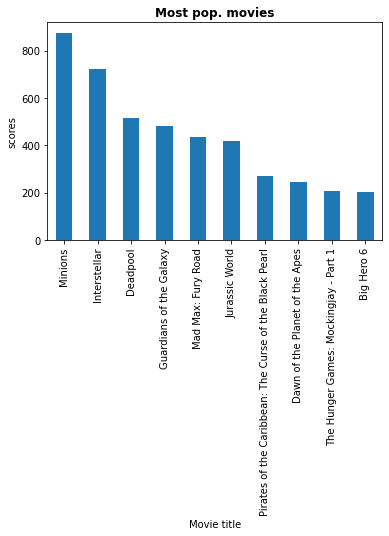

In [33]:
pop.set_index('original_title')['popularity'].nlargest(10).plot(kind='bar')
plt.title('Most pop. movies',weight='bold')
plt.xlabel('Movie title')
plt.ylabel('scores')

## Build Recommendation system based on scaled weighted average and normalized_popularity score(Priority is given 50% to both)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaling=MinMaxScaler()

In [37]:
popularity.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [38]:
popularity[['weighted_avg','popularity']]

weighted_avg  popularity
546       6.311706  875.581305
95        7.809479  724.247784
788       7.212652  514.569956
94        7.613005  481.098624
127       7.019214  434.278564
...            ...         ...
101       6.836047    3.195174
203       6.556517    2.871739
508       6.154170    2.502487
2511      6.664295    2.186927
334       5.884137    1.859364

[481 rows x 2 columns]

In [40]:
## storing your df_normalized into df_scaled..

df_scaled=scaling.fit_transform(popularity[['weighted_avg','popularity']])

In [41]:
df_scaled

array([[3.98128045e-01, 1.00000000e+00],
       [9.13973899e-01, 8.26794414e-01],
       [7.08421675e-01, 5.86812083e-01],
       [8.46306871e-01, 5.48503176e-01],
       [6.41799791e-01, 4.94916265e-01],
       [4.38386603e-01, 4.77095937e-01],
       [7.06362051e-01, 3.09152732e-01],
       [6.16113791e-01, 2.76898596e-01],
       [4.54099181e-01, 2.33904836e-01],
       [7.75092218e-01, 2.31052028e-01],
       [2.55715090e-01, 2.29115536e-01],
       [5.99341439e-01, 2.24914840e-01],
       [8.53462201e-01, 2.18226724e-01],
       [9.52045433e-01, 2.12268405e-01],
       [7.36989547e-01, 1.90075925e-01],
       [9.32489632e-01, 1.89676301e-01],
       [6.31298177e-01, 1.86862655e-01],
       [2.15532689e-01, 1.76178577e-01],
       [6.52633428e-01, 1.70052057e-01],
       [9.58670493e-01, 1.65839977e-01],
       [5.54046256e-01, 1.64798442e-01],
       [8.19837355e-01, 1.64245878e-01],
       [7.12123157e-01, 1.63197537e-01],
       [9.28355640e-01, 1.62294578e-01],
       [2.632365

In [42]:
popularity[['weighted_avg_scaled','popularity_scaled']]=df_scaled

In [43]:
popularity.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled'],
      dtype='object')

In [44]:
popularity.head(3)

Unnamed: 0     budget                                             genres  \
546         546   74000000  [{"id": 10751, "name": "Family"}, {"id": 16, "...   
95           95  165000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...   
788         788   58000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

         id                                           keywords  \
546  211672  [{"id": 3487, "name": "assistant"}, {"id": 179...   
95   157336  [{"id": 83, "name": "saving the world"}, {"id"...   
788  293660  [{"id": 2095, "name": "anti hero"}, {"id": 307...   

    original_language original_title  \
546                en        Minions   
95                 en   Interstellar   
788                en       Deadpool   

                                              overview  popularity  \
546  Minions Stuart, Kevin and Bob are recruited by...  875.581305   
95   Interstellar chronicles the adventures of a gr...  724.247784   
788  Deadpool tells the origin story of former Spec...  514.569956   

                                  production_companies  ... runtime  \
546  [{"name": "Universal Pictures", "id": 33}, {"n...  ...    91.0   
95   [{"name": "Paramount Pictures", "id": 4}, {"na...  ...   169.0   
788  [{"name": "Twentieth Century Fox Film Corporat...  ...   108.0   

                             spoken_languages  \
546  [{"iso_639_1": "en", "name": "English"}]   
95   [{"iso_639_1": "en", "name": "English"}]   
788  [{"iso_639_1": "en", "name": "English"}]   

                                               tagline vote_average  \
546       Before Gru, they had a history of bad bosses          6.4   
95   Mankind was born on Earth. It was never meant ...          8.1   
788            Witness the beginning of a happy ending          7.4   

    vote_count                                               cast  \
546       4571  [{"cast_id": 22, "character": "Scarlet Overkil...   
95       10867  [{"cast_id": 9, "character": "Joseph Cooper", ...   
788      10995  [{"cast_id": 99, "character": "Wade Wilson / D...   

                                                  crew weighted_avg  \
546  [{"credit_id": "5431b2b10e0a2656e20026c7", "de...     6.311706   
95   [{"credit_id": "52fe4bbf9251416c910e4801", "de...     7.809479   
788  [{"credit_id": "56c986b2925141172f0068b6", "de...     7.212652   

    weighted_avg_scaled  popularity_scaled  
546            0.398128           1.000000  
95             0.913974           0.826794  
788            0.708422           0.586812  

[3 rows x 22 columns]

In [45]:
popularity.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled'],
      dtype='object')

In [47]:
### score_mix must have share of 50 percent of weighted_avg_scaled & 50 % of popularity_scaled..

popularity['score_mix']=popularity['weighted_avg_scaled'] * 0.5 + popularity['popularity_scaled'] * 0.5

In [48]:
popularity.head(2)

Unnamed: 0     budget                                             genres  \
546         546   74000000  [{"id": 10751, "name": "Family"}, {"id": 16, "...   
95           95  165000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...   

         id                                           keywords  \
546  211672  [{"id": 3487, "name": "assistant"}, {"id": 179...   
95   157336  [{"id": 83, "name": "saving the world"}, {"id"...   

    original_language original_title  \
546                en        Minions   
95                 en   Interstellar   

                                              overview  popularity  \
546  Minions Stuart, Kevin and Bob are recruited by...  875.581305   
95   Interstellar chronicles the adventures of a gr...  724.247784   

                                  production_companies  ...  \
546  [{"name": "Universal Pictures", "id": 33}, {"n...  ...   
95   [{"name": "Paramount Pictures", "id": 4}, {"na...  ...   

                             spoken_languages  \
546  [{"iso_639_1": "en", "name": "English"}]   
95   [{"iso_639_1": "en", "name": "English"}]   

                                               tagline  vote_average  \
546       Before Gru, they had a history of bad bosses           6.4   
95   Mankind was born on Earth. It was never meant ...           8.1   

    vote_count                                               cast  \
546       4571  [{"cast_id": 22, "character": "Scarlet Overkil...   
95       10867  [{"cast_id": 9, "character": "Joseph Cooper", ...   

                                                  crew  weighted_avg  \
546  [{"credit_id": "5431b2b10e0a2656e20026c7", "de...      6.311706   
95   [{"credit_id": "52fe4bbf9251416c910e4801", "de...      7.809479   

    weighted_avg_scaled popularity_scaled  score_mix  
546            0.398128          1.000000   0.699064  
95             0.913974          0.826794   0.870384  

[2 rows x 23 columns]

In [49]:
popularity.shape

(481, 23)

In [51]:
popularity_sort=popularity.sort_values(['score_mix'],ascending=False)

In [52]:
popularity_sort

Unnamed: 0     budget                                             genres  \
95           95  165000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...   
546         546   74000000  [{"id": 10751, "name": "Family"}, {"id": 16, "...   
94           94  170000000  [{"id": 28, "name": "Action"}, {"id": 878, "na...   
788         788   58000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
65           65  185000000  [{"id": 18, "name": "Drama"}, {"id": 28, "name...   
..          ...        ...                                                ...   
337         337   92000000  [{"id": 28, "name": "Action"}, {"id": 53, "nam...   
41           41  200000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
193         193  130000000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
91           91  165000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
242         242  120000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

         id                                           keywords  \
95   157336  [{"id": 83, "name": "saving the world"}, {"id"...   
546  211672  [{"id": 3487, "name": "assistant"}, {"id": 179...   
94   118340  [{"id": 8828, "name": "marvel comic"}, {"id": ...   
788  293660  [{"id": 2095, "name": "anti hero"}, {"id": 307...   
65      155  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
..      ...                                                ...   
337   47964  [{"id": 258, "name": "bomb"}, {"id": 591, "nam...   
41    44912  [{"id": 849, "name": "dc comics"}, {"id": 4375...   
193   82700                 [{"id": 4565, "name": "dystopia"}]   
91    47933  [{"id": 12026, "name": "alternate history"}, {...   
242  166424  [{"id": 3822, "name": "teleportation"}, {"id":...   

    original_language                original_title  \
95                 en                  Interstellar   
546                en                       Minions   
94                 en       Guardians of the Galaxy   
788                en                      Deadpool   
65                 en               The Dark Knight   
..                ...                           ...   
337                en        A Good Day to Die Hard   
41                 en                 Green Lantern   
193                en                   After Earth   
91                 en  Independence Day: Resurgence   
242                en                Fantastic Four   

                                              overview  popularity  \
95   Interstellar chronicles the adventures of a gr...  724.247784   
546  Minions Stuart, Kevin and Bob are recruited by...  875.581305   
94   Light years from Earth, 26 years after being a...  481.098624   
788  Deadpool tells the origin story of former Spec...  514.569956   
65   Batman raises the stakes in his war on crime. ...  187.322927   
..                                                 ...         ...   
337  Iconoclastic, take-no-prisoners cop John McCla...   65.402595   
41   For centuries, a small but powerful force of w...   51.872839   
193  One thousand years after cataclysmic events fo...   42.840582   
91   We always knew they were coming back. Using re...   48.775723   
242  Four young outsiders teleport to a dangerous u...   38.126095   

                                  production_companies  ...  \
95   [{"name": "Paramount Pictures", "id": 4}, {"na...  ...   
546  [{"name": "Universal Pictures", "id": 33}, {"n...  ...   
94   [{"name": "Marvel Studios", "id": 420}, {"name...  ...   
788  [{"name": "Twentieth Century Fox Film Corporat...  ...   
65   [{"name": "DC Comics", "id": 429}, {"name": "L...  ...   
..                                                 ...  ...   
337  [{"name": "Ingenious Media", "id": 290}, {"nam...  ...   
41   [{"name": "De Line Pictures", "id": 2609}, {"n...  ...   
193  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   
91   [{"name": "Twentieth Century Fox Film Corporat...  ...   
242  [{"name": "Twentieth Century Fox Film C

In [55]:
popularity_sort[0:10]['score_mix']

95      0.870384
546     0.699064
94      0.697405
788     0.647617
65      0.582157
1881    0.577192
127     0.568358
662     0.562255
96      0.561083
3337    0.545325
Name: score_mix, dtype: float64

In [56]:
popularity_sort.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled', 'score_mix'],
      dtype='object')

In [ ]:
### Visualise Data using plotly

In [ ]:
!pip install plotly

In [53]:
import plotly.express as px

In [57]:
px.bar(x=popularity_sort[0:10]['original_title'],y=popularity_sort[0:10]['score_mix'])